# Import the data:

In [ ]:
!pip install prophet

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
recyplast= pd.read_csv('/content/concatenated_df.csv')

In [ ]:
recyplast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133940 entries, 0 to 133939
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   horodatage      133940 non-null  object 
 1   cgn_temp_z1     133940 non-null  float64
 2   cgn_temp_z2     133940 non-null  float64
 3   cgn_temp_z3     133940 non-null  float64
 4   cgn_temp_z4     133940 non-null  float64
 5   cgn_temp_z5     133940 non-null  float64
 6   cgn_prop_pp_30  133940 non-null  float64
 7   cgn_prop_pp_40  133940 non-null  float64
 8   cgn_prop_pp_89  133940 non-null  float64
 9   cgn_mot_spe     133940 non-null  float64
 10  mes_pre_mat     133940 non-null  float64
 11  mes_temp_mat    133940 non-null  float64
 12  mes_temp_z1     133940 non-null  float64
 13  mes_temp_z2     133940 non-null  float64
 14  mes_temp_z3     133940 non-null  float64
 15  mes_temp_z4     133940 non-null  float64
 16  mes_temp_z5     133940 non-null  float64
 17  qual_indic

In [ ]:
recyplast.describe()

cgn_temp_z1    cgn_temp_z2    cgn_temp_z3    cgn_temp_z4  \
count  133940.000000  133940.000000  133940.000000  133940.000000   
mean      170.830626     174.272234     178.218348     180.956525   
std        12.687827      10.652041       9.134073       8.604597   
min        85.000000      85.000000      85.000000      85.000000   
25%       170.000000     170.000000     175.000000     180.000000   
50%       170.000000     175.000000     180.000000     185.000000   
75%       180.000000     180.000000     185.000000     185.000000   
max       190.000000     190.000000     190.000000     190.000000   

         cgn_temp_z5  cgn_prop_pp_30  cgn_prop_pp_40  cgn_prop_pp_89  \
count  133940.000000   133940.000000   133940.000000   133940.000000   
mean      188.573757       27.737946       46.135333       26.059508   
std         8.674120       33.610921       33.825405       25.675465   
min        87.500000        0.000000        0.000000        0.000000   
25%       185.000000        0.000000        0.000000        0.000000   
50%       190.000000       25.000000       50.000000       25.000000   
75%       195.000000       50.000000       75.000000       25.000000   
max       200.000000      100.000000      100.000000      100.000000   

         cgn_mot_spe    mes_pre_mat   mes_temp_mat    mes_temp_z1  \
count  133940.000000  133940.000000  133940.000000  133940.000000   
mean        8.578927       9.342097     109.133093     105.838476   
std        15.346504      24.766457      57.112210      65.527454   
min         0.000000    -175.000000       9.000000       9.000000   
25%         0.000000      -9.000000      49.000000      36.000000   
50%         0.000000      -2.000000     134.000000     123.000000   
75%        10.000000      21.000000     161.000000     170.000000   
max        75.000000     203.500000     179.000000     201.000000   

         mes_temp_z2    mes_temp_z3    mes_temp_z4    mes_temp_z5  \
count  133940.000000  133940.000000  133940.000000  133940.000000   
mean      118.206283     122.635759     123.208575     118.589085   
std        62.336625      61.896899      63.229649      70.385731   
min         8.500000       9.000000       8.500000       8.500000   
25%        52.000000      59.000000      58.000000      41.000000   
50%       150.000000     152.000000     154.000000     144.000000   
75%       175.000000     178.000000     180.000000     187.000000   
max       195.000000     195.000000     195.000000     204.000000   

          qual_indic  
count  133940.000000  
mean        0.239014  
std         0.426249  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000

In [ ]:
recyplast.shape

(133940, 18)

In [ ]:
df_for_prophet_copy_train, df_for_prophet_copy_test = train_test_split(recyplast, test_size=0.2, random_state=42)

print(df_for_prophet_copy_train.shape)
print(df_for_prophet_copy_test.shape)

(107152, 18)
(26788, 18)


In [ ]:
df_for_prophet_copy_train['horodatage']= pd.to_datetime(df_for_prophet_copy_train['horodatage'])
df_for_prophet_copy_test['horodatage']= pd.to_datetime(df_for_prophet_copy_test['horodatage'])

In [ ]:
df_for_prophet_copy_train.rename(columns={'horodatage':'ds'}, inplace=True)
df_for_prophet_copy_test.rename(columns={'horodatage':'ds'}, inplace=True)
df_for_prophet_copy_train.head(5)

ds  cgn_temp_z1  cgn_temp_z2  cgn_temp_z3  \
78745  2024-05-07 03:12:32        170.0        175.0        180.0   
107576 2024-03-01 11:13:44        170.0        175.0        180.0   
86485  2024-05-07 07:30:32        170.0        175.0        180.0   
123700 2024-07-22 12:05:02        155.0        165.0        175.0   
112575 2024-03-01 14:00:22        175.0        175.0        180.0   

        cgn_temp_z4  cgn_temp_z5  cgn_prop_pp_30  cgn_prop_pp_40  \
78745         185.0        190.0             0.0            75.0   
107576        180.0        190.0           100.0             0.0   
86485         185.0        190.0             0.0            75.0   
123700        180.0        195.0            25.0            25.0   
112575        180.0        190.0           100.0             0.0   

        cgn_prop_pp_89  cgn_mot_spe  mes_pre_mat  mes_temp_mat  mes_temp_z1  \
78745             25.0          0.0         -9.0          17.0         18.0   
107576             0.0         40.0         73.0         170.0        169.0   
86485             25.0          0.0         -9.0          17.0         18.0   
123700            50.0          0.0         -5.0          91.0         50.0   
112575             0.0         20.0         65.0         160.0        174.0   

        mes_temp_z2  mes_temp_z3  mes_temp_z4  mes_temp_z5  qual_indic  
78745          18.0         18.0         18.0         18.0         0.0  
107576        175.0        180.0        180.0        188.0         0.0  
86485          18.0         18.0         18.0         17.0         0.0  
123700         92.0        107.0        105.0         74.0         0.0  
112575        175.0        181.0        181.0        190.0         0.0

# consigne_temperature_zone_01:

In [ ]:
df_for_prophet_copy_train1= df_for_prophet_copy_train.copy()
df_for_prophet_copy_test1= df_for_prophet_copy_test.copy()

In [ ]:
df_for_prophet_copy_train1.rename(columns={'cgn_temp_z1':'y'}, inplace=True)
df_for_prophet_copy_test1.rename(columns={'cgn_temp_z1':'y'}, inplace=True)

In [ ]:
model1= Prophet(interval_width=0.9)
model1.add_regressor('mes_pre_mat', standardize=False)
model1.add_regressor('cgn_prop_pp_30', standardize=False)
model1.add_regressor('cgn_prop_pp_40', standardize=False)
model1.add_regressor('cgn_prop_pp_89', standardize=False)
model1.add_regressor('cgn_temp_z2', standardize=False)
model1.add_regressor('cgn_temp_z3', standardize=False)
model1.add_regressor('cgn_temp_z4', standardize=False)
model1.add_regressor('cgn_temp_z5', standardize=False)
model1.add_regressor('cgn_mot_spe', standardize=False)
model1.add_regressor('mes_temp_mat', standardize=False)
model1.add_regressor('mes_temp_z1', standardize=False)
model1.add_regressor('mes_temp_z2', standardize=False)
model1.add_regressor('mes_temp_z3', standardize=False)
model1.add_regressor('mes_temp_z4', standardize=False)
model1.add_regressor('mes_temp_z5', standardize=False)
model1.add_regressor('qual_indic', standardize=False)
model1.fit(df_for_prophet_copy_train1)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8iff1jc3/paunqtn7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8iff1jc3/y5dtaudl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41765', 'data', 'file=/tmp/tmp8iff1jc3/paunqtn7.json', 'init=/tmp/tmp8iff1jc3/y5dtaudl.json', 'output', 'file=/tmp/tmp8iff1jc3/prophet_modeljud88f72/prophet_model-20240904131450.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:14:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:23:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
model1.params

OrderedDict([('lp__', array([[372287.]])),
             ('k', array([[0.333512]])),
             ('m', array([[0.431745]])),
             ('delta',
              array([[-0.113179  , -0.112986  , -0.112752  , -0.00012662,  0.00022231,
                       0.00051962,  0.00076195,  0.00097295,  0.00114634,  0.00132393,
                       0.00149879,  0.0083091 ,  0.00847975,  0.00860622,  0.00865242,
                       0.00868568, -0.0117778 , -0.0118817 , -0.0116408 , -0.011645  ,
                      -0.011526  , -0.00698443, -0.00580639, -0.00590545, -0.00597232]])),
             ('sigma_obs', array([[0.0282228]])),
             ('beta',
              array([[-1.06824e-02,  3.55233e-02,  9.38106e-03, -6.63778e-03,
                      -1.03349e-02,  1.61803e-02,  5.12065e-03,  7.12017e-03,
                      -1.92676e-03, -3.01068e-03, -1.74187e-03,  3.22181e-03,
                       3.25365e-03,  1.42742e-03, -7.81872e-05, -3.99365e-03,
                      -4.0165

In [ ]:
df_for_prophet_copy_test11 = df_for_prophet_copy_test1[['ds','cgn_temp_z2',
                                'cgn_temp_z3','cgn_temp_z4',
                                'cgn_temp_z5',
                                'cgn_mot_spe',
                                'qual_indic',
                                'cgn_prop_pp_30',
                                'cgn_prop_pp_40',
                                'cgn_prop_pp_89',
                                'mes_pre_mat',
                                'mes_temp_mat',
                                'mes_temp_z1',
                                'mes_temp_z2',
                                'mes_temp_z3',
                             'mes_temp_z4',
                               'mes_temp_z5']]

In [ ]:
forecast1= model1.predict(df_for_prophet_copy_test11)
forecast1 =forecast1[['ds','yhat','yhat_lower', 'yhat_upper']]
forecast1.head(5)

ds        yhat  yhat_lower  yhat_upper
0 2024-03-01 07:51:24  173.138485  163.928931  182.253237
1 2024-03-01 07:51:26  170.686645  162.070869  179.579640
2 2024-03-01 07:51:38  170.675183  162.668738  178.902262
3 2024-03-01 07:51:48  170.754952  161.625674  179.160520
4 2024-03-01 07:51:54  170.828637  161.753758  179.515420

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


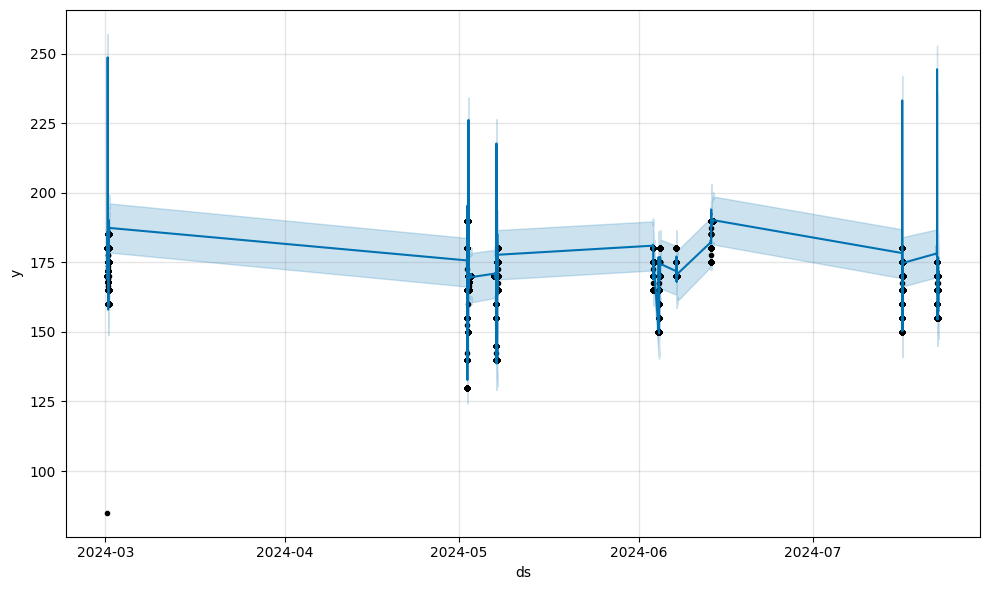

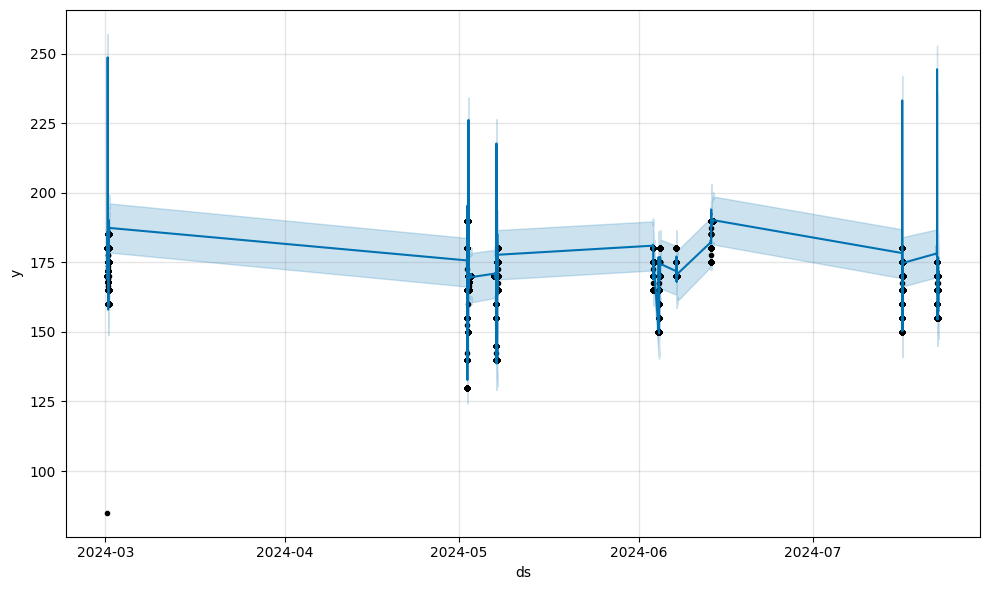

In [ ]:
model1.plot(forecast1, uncertainty=True)

In [ ]:
print(df_for_prophet_copy_test1.columns)


Index(['ds', 'y', 'cgn_temp_z2', 'cgn_temp_z3', 'cgn_temp_z4', 'cgn_temp_z5',
       'cgn_prop_pp_30', 'cgn_prop_pp_40', 'cgn_prop_pp_89', 'cgn_mot_spe',
       'mes_pre_mat', 'mes_temp_mat', 'mes_temp_z1', 'mes_temp_z2',
       'mes_temp_z3', 'mes_temp_z4', 'mes_temp_z5', 'qual_indic'],
      dtype='object')


In [ ]:
merged_df1 = pd.merge(df_for_prophet_copy_test1[['ds', 'y']], forecast1[['ds', 'yhat']], on='ds')


In [ ]:
mae = mean_absolute_error(merged_df1['y'], merged_df1['yhat'])
r2 = r2_score(merged_df1['y'], merged_df1['yhat'])
rmse = np.sqrt(mean_squared_error(merged_df1['y'], merged_df1['yhat']))

In [ ]:
print(f"MAE: {mae}")
print(f"R²: {r2}")
print(f"RMSE: {rmse}")

MAE: 1.4324109936712333
R²: 0.9626324681498998
RMSE: 2.4495969040545065


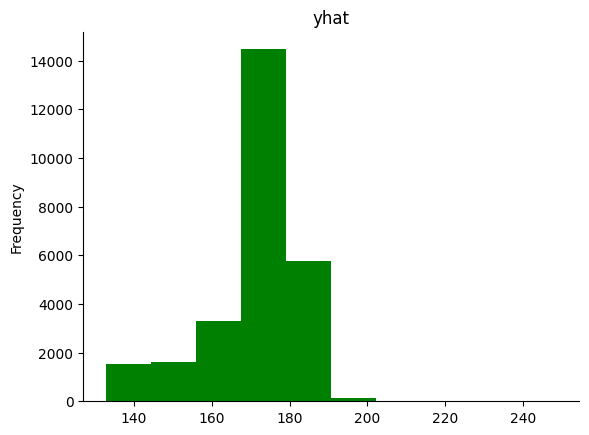

In [ ]:
forecast1['yhat'].plot(kind='hist', bins=10, title='yhat', color='green')
plt.gca().spines[['top', 'right',]].set_visible(False)

# consigne_temperature_zone_02:

In [ ]:
df_for_prophet_copy_train2= df_for_prophet_copy_train.copy()
df_for_prophet_copy_test2= df_for_prophet_copy_test.copy()

In [ ]:
df_for_prophet_copy_train2.rename(columns={'cgn_temp_z2':'y'}, inplace=True)
df_for_prophet_copy_test2.rename(columns={'cgn_temp_z2':'y'}, inplace=True)

In [ ]:
model2= Prophet(interval_width=0.9)
model2.add_regressor('mes_pre_mat', standardize=False)
model2.add_regressor('cgn_prop_pp_30', standardize=False)
model2.add_regressor('cgn_prop_pp_40', standardize=False)
model2.add_regressor('cgn_prop_pp_89', standardize=False)
model2.add_regressor('cgn_temp_z1', standardize=False)
model2.add_regressor('cgn_temp_z3', standardize=False)
model2.add_regressor('cgn_temp_z4', standardize=False)
model2.add_regressor('cgn_temp_z5', standardize=False)
model2.add_regressor('cgn_mot_spe', standardize=False)
model2.add_regressor('mes_temp_mat', standardize=False)
model2.add_regressor('mes_temp_z1', standardize=False)
model2.add_regressor('mes_temp_z2', standardize=False)
model2.add_regressor('mes_temp_z3', standardize=False)
model2.add_regressor('mes_temp_z4', standardize=False)
model2.add_regressor('mes_temp_z5', standardize=False)
model2.add_regressor('qual_indic', standardize=False)
model2.fit(df_for_prophet_copy_train2)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8iff1jc3/k_7v2684.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8iff1jc3/cl20d3g0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90247', 'data', 'file=/tmp/tmp8iff1jc3/k_7v2684.json', 'init=/tmp/tmp8iff1jc3/cl20d3g0.json', 'output', 'file=/tmp/tmp8iff1jc3/prophet_modelaf11nui1/prophet_model-20240904132909.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:29:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:38:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
model2.params

OrderedDict([('lp__', array([[385840.]])),
             ('k', array([[0.351239]])),
             ('m', array([[0.431247]])),
             ('delta',
              array([[-0.121696  , -0.121618  , -0.121524  ,  0.00146917,  0.0015563 ,
                       0.00165433,  0.0017431 ,  0.00179303,  0.00183194,  0.00184919,
                       0.00187308,  0.0022773 ,  0.0022862 ,  0.00230559,  0.0023235 ,
                       0.00234009,  0.00262952,  0.00263304,  0.00236416,  0.00236043,
                       0.00239478,  0.00326289, -0.00564722, -0.00575892, -0.00582185]])),
             ('sigma_obs', array([[0.0261948]])),
             ('beta',
              array([[ 6.18098e-03, -2.04053e-02, -4.72517e-03,  1.02521e-02,
                       6.96797e-03, -1.22064e-02, -5.58228e-03, -1.03337e-02,
                       2.73804e-03,  1.45225e-03,  1.97739e-03, -2.16998e-03,
                      -1.67128e-03, -1.20464e-03,  1.26480e-04, -4.04513e-03,
                      -3.9797

In [ ]:
df_for_prophet_copy_test12 = df_for_prophet_copy_test2[['ds','cgn_temp_z1',
                                'cgn_temp_z3','cgn_temp_z4',
                                'cgn_temp_z5',
                                'cgn_mot_spe',
                                'qual_indic',
                                'cgn_prop_pp_30',
                                'cgn_prop_pp_40',
                                'cgn_prop_pp_89',
                                'mes_pre_mat',
                                'mes_temp_mat',
                                'mes_temp_z1',
                                'mes_temp_z2',
                                'mes_temp_z3',
                             'mes_temp_z4',
                               'mes_temp_z5']]

In [ ]:
forecast2= model2.predict(df_for_prophet_copy_test12)
forecast2 =forecast2[['ds','yhat','yhat_lower', 'yhat_upper']]
forecast2.head(5)

ds        yhat  yhat_lower  yhat_upper
0 2024-03-01 07:51:24  165.563783  157.619258  173.994032
1 2024-03-01 07:51:26  169.529501  161.654705  177.574380
2 2024-03-01 07:51:38  169.544942  161.448923  177.514440
3 2024-03-01 07:51:48  169.479697  160.975326  177.242580
4 2024-03-01 07:51:54  169.425325  160.894442  177.174975

In [ ]:
merged_df2 = pd.merge(df_for_prophet_copy_test2[['ds', 'y']], forecast2[['ds', 'yhat']], on='ds')
mae = mean_absolute_error(merged_df2['y'], merged_df2['yhat'])
r2 = r2_score(merged_df2['y'], merged_df2['yhat'])
rmse = np.sqrt(mean_squared_error(merged_df2['y'], merged_df2['yhat']))

print(f"MAE: {mae}")
print(f"R²: {r2}")
print(f"RMSE: {rmse}")

MAE: 0.9403190724912102
R²: 0.9763201834891199
RMSE: 1.636686944221844


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


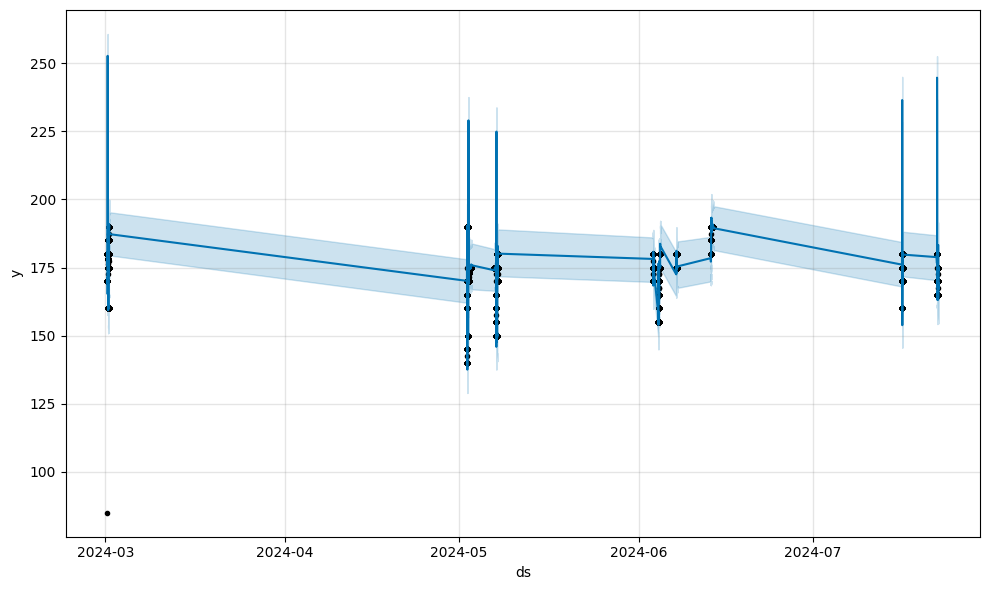

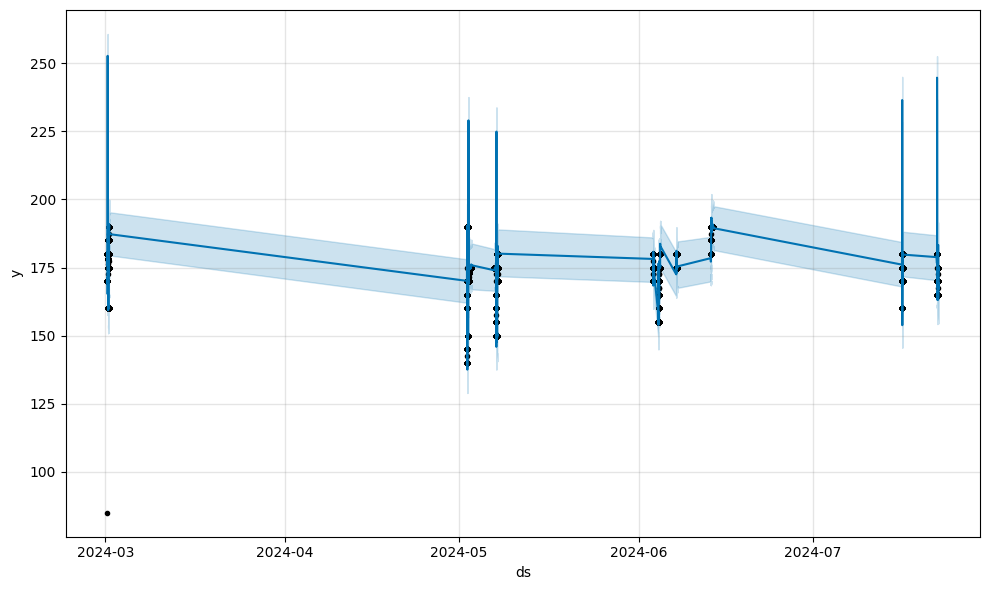

In [ ]:
model2.plot(forecast2, uncertainty=True)

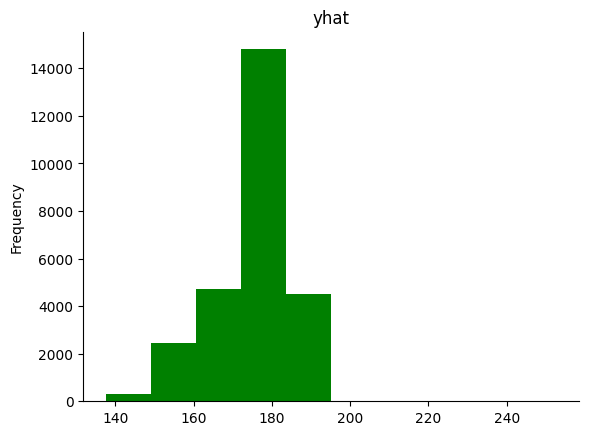

In [ ]:
forecast2['yhat'].plot(kind='hist', bins=10, title='yhat', color='green')
plt.gca().spines[['top', 'right',]].set_visible(False)

# consigne_temperature_zone_03:

In [ ]:
df_for_prophet_copy_train3= df_for_prophet_copy_train.copy()
df_for_prophet_copy_test3= df_for_prophet_copy_test.copy()

df_for_prophet_copy_train3.rename(columns={'cgn_temp_z3':'y'}, inplace=True)
df_for_prophet_copy_test3.rename(columns={'cgn_temp_z3':'y'}, inplace=True)

In [ ]:
model3= Prophet(interval_width=0.9)
model3.add_regressor('mes_pre_mat', standardize=False)
model3.add_regressor('cgn_prop_pp_30', standardize=False)
model3.add_regressor('cgn_prop_pp_40', standardize=False)
model3.add_regressor('cgn_prop_pp_89', standardize=False)
model3.add_regressor('cgn_temp_z2', standardize=False)
model3.add_regressor('cgn_temp_z1', standardize=False)
model3.add_regressor('cgn_temp_z4', standardize=False)
model3.add_regressor('cgn_temp_z5', standardize=False)
model3.add_regressor('cgn_mot_spe', standardize=False)
model3.add_regressor('mes_temp_mat', standardize=False)
model3.add_regressor('mes_temp_z1', standardize=False)
model3.add_regressor('mes_temp_z2', standardize=False)
model3.add_regressor('mes_temp_z3', standardize=False)
model3.add_regressor('mes_temp_z4', standardize=False)
model3.add_regressor('mes_temp_z5', standardize=False)
model3.add_regressor('qual_indic', standardize=False)
model3.fit(df_for_prophet_copy_train3)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8iff1jc3/v007h21u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8iff1jc3/qa2sy3qq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7238', 'data', 'file=/tmp/tmp8iff1jc3/v007h21u.json', 'init=/tmp/tmp8iff1jc3/qa2sy3qq.json', 'output', 'file=/tmp/tmp8iff1jc3/prophet_modelq1oc6o2j/prophet_model-20240904133856.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:38:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:47:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
model3.params

OrderedDict([('lp__', array([[399327.]])),
             ('k', array([[0.382286]])),
             ('m', array([[0.42897]])),
             ('delta',
              array([[-1.16916e-01, -1.16756e-01, -1.16604e-01, -4.57426e-03,
                      -4.40870e-03, -4.21467e-03, -4.03923e-03, -3.88405e-03,
                      -3.79227e-03, -3.71594e-03, -3.64023e-03, -9.60755e-04,
                      -8.89860e-04, -8.23918e-04, -7.58878e-04, -6.85516e-04,
                       3.95168e-03,  3.93475e-03,  4.10617e-03,  4.11517e-03,
                       4.12794e-03,  5.70535e-03,  1.87716e-04,  1.25884e-04,
                       2.76002e-05]])),
             ('sigma_obs', array([[0.0227933]])),
             ('beta',
              array([[-1.00948e-04,  5.75633e-03, -3.16079e-03,  5.49517e-04,
                      -4.82298e-03,  5.75186e-03, -5.32587e-04, -8.54458e-04,
                       1.53516e-03, -2.81982e-03,  7.96115e-04, -9.00902e-04,
                      -1.48517e-03,  1.

In [ ]:
df_for_prophet_copy_test13 = df_for_prophet_copy_test3[['ds','cgn_temp_z2',
                                'cgn_temp_z1','cgn_temp_z4',
                                'cgn_temp_z5',
                                'cgn_mot_spe',
                                'qual_indic',
                                'cgn_prop_pp_30',
                                'cgn_prop_pp_40',
                                'cgn_prop_pp_89',
                                'mes_pre_mat',
                                'mes_temp_mat',
                                'mes_temp_z1',
                                'mes_temp_z2',
                                'mes_temp_z3',
                             'mes_temp_z4',
                               'mes_temp_z5']]

In [ ]:
forecast3= model3.predict(df_for_prophet_copy_test13)
forecast3 =forecast3[['ds','yhat','yhat_lower', 'yhat_upper']]
forecast3.head(5)

ds        yhat  yhat_lower  yhat_upper
0 2024-03-01 07:51:24  166.592053  159.891790  173.387422
1 2024-03-01 07:51:26  166.723381  159.525300  173.646086
2 2024-03-01 07:51:38  166.723368  159.673130  173.995932
3 2024-03-01 07:51:48  166.467140  159.662946  173.868713
4 2024-03-01 07:51:54  166.211449  159.019922  173.572014

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


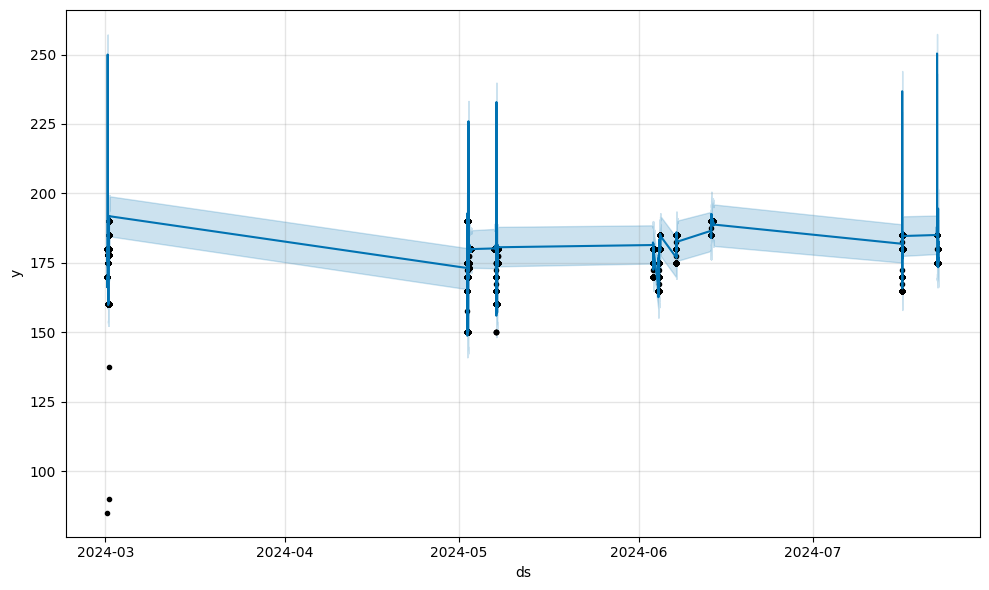

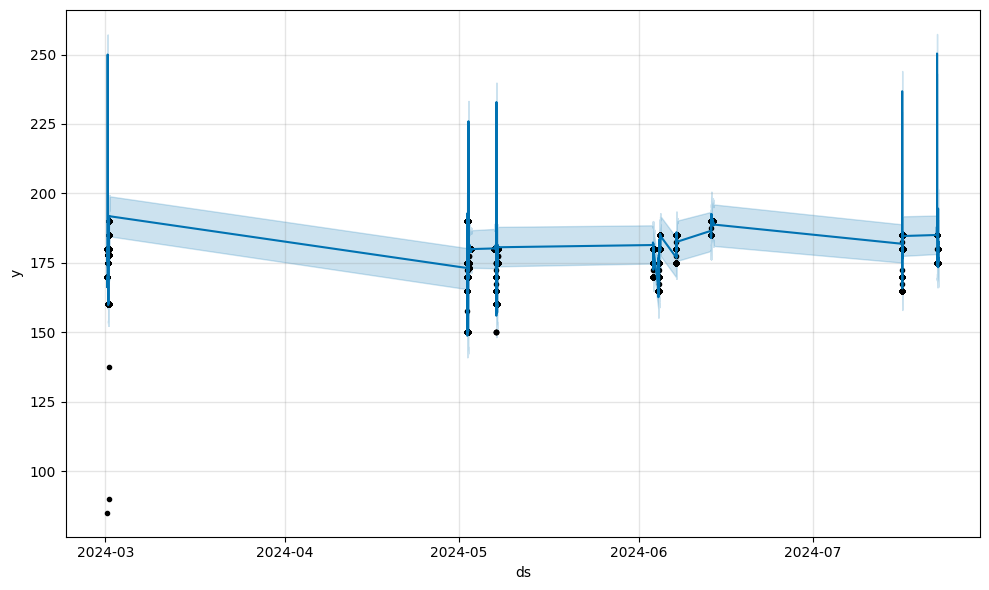

In [ ]:
model3.plot(forecast3, uncertainty=True)

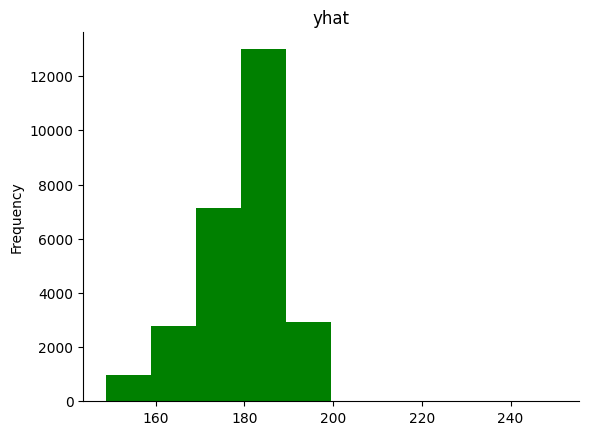

In [ ]:
forecast3['yhat'].plot(kind='hist', bins=10, title='yhat', color='green')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
merged_df3 = pd.merge(df_for_prophet_copy_test3[['ds', 'y']], forecast3[['ds', 'yhat']], on='ds')
mae = mean_absolute_error(merged_df3['y'], merged_df3['yhat'])
r2 = r2_score(merged_df3['y'], merged_df3['yhat'])
rmse = np.sqrt(mean_squared_error(merged_df3['y'], merged_df3['yhat']))

print(f"MAE: {mae}")
print(f"R²: {r2}")
print(f"RMSE: {rmse}")

MAE: 0.9651839804728238
R²: 0.9693703174486942
RMSE: 1.5961874093149073


# consigne_temperature_zone_04:

In [ ]:
df_for_prophet_copy_train4= df_for_prophet_copy_train.copy()
df_for_prophet_copy_test4= df_for_prophet_copy_test.copy()

df_for_prophet_copy_train4.rename(columns={'cgn_temp_z4':'y'}, inplace=True)
df_for_prophet_copy_test4.rename(columns={'cgn_temp_z4':'y'}, inplace=True)

In [ ]:
model4= Prophet(interval_width=0.9)
model4.add_regressor('mes_pre_mat', standardize=False)
model4.add_regressor('cgn_prop_pp_30', standardize=False)
model4.add_regressor('cgn_prop_pp_40', standardize=False)
model4.add_regressor('cgn_prop_pp_89', standardize=False)
model4.add_regressor('cgn_temp_z2', standardize=False)
model4.add_regressor('cgn_temp_z1', standardize=False)
model4.add_regressor('cgn_temp_z3', standardize=False)
model4.add_regressor('cgn_temp_z5', standardize=False)
model4.add_regressor('cgn_mot_spe', standardize=False)
model4.add_regressor('mes_temp_mat', standardize=False)
model4.add_regressor('mes_temp_z1', standardize=False)
model4.add_regressor('mes_temp_z2', standardize=False)
model4.add_regressor('mes_temp_z3', standardize=False)
model4.add_regressor('mes_temp_z4', standardize=False)
model4.add_regressor('mes_temp_z5', standardize=False)
model4.add_regressor('qual_indic', standardize=False)
model4.fit(df_for_prophet_copy_train4)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8iff1jc3/7zabwhah.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8iff1jc3/odewk13m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35164', 'data', 'file=/tmp/tmp8iff1jc3/7zabwhah.json', 'init=/tmp/tmp8iff1jc3/odewk13m.json', 'output', 'file=/tmp/tmp8iff1jc3/prophet_model96ruanmk/prophet_model-20240904134802.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:48:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:56:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
model4.params

OrderedDict([('lp__', array([[374661.]])),
             ('k', array([[0.394808]])),
             ('m', array([[0.433209]])),
             ('delta',
              array([[-0.130786  , -0.130641  , -0.130475  , -0.00685979, -0.00669067,
                      -0.00652612, -0.0063985 , -0.00628885, -0.00615403, -0.0060015 ,
                      -0.0058571 ,  0.00024609,  0.00039327,  0.00054324,  0.00068651,
                       0.00077859,  0.00507379,  0.00503118,  0.00480949,  0.00478972,
                       0.00488185,  0.00864128,  0.00620443,  0.00618704,  0.00622594]])),
             ('sigma_obs', array([[0.029078]])),
             ('beta',
              array([[-8.87941e-04,  8.01484e-03, -1.11451e-03, -7.12721e-03,
                      -7.60300e-03,  6.90623e-03,  8.34548e-03,  1.30686e-02,
                      -3.82061e-03,  6.58321e-04, -3.20550e-03,  1.95723e-03,
                       1.69062e-03, -1.91826e-03, -7.92270e-05, -4.65985e-03,
                      -4.59026

In [ ]:
df_for_prophet_copy_test14 = df_for_prophet_copy_test4[['ds','cgn_temp_z2',
                                'cgn_temp_z3','cgn_temp_z1',
                                'cgn_temp_z5',
                                'cgn_mot_spe',
                                'qual_indic',
                                'cgn_prop_pp_30',
                                'cgn_prop_pp_40',
                                'cgn_prop_pp_89',
                                'mes_pre_mat',
                                'mes_temp_mat',
                                'mes_temp_z1',
                                'mes_temp_z2',
                                'mes_temp_z3',
                             'mes_temp_z4',
                               'mes_temp_z5']]

In [ ]:
forecast4= model4.predict(df_for_prophet_copy_test14)
forecast4 =forecast4[['ds','yhat','yhat_lower', 'yhat_upper']]
forecast4.head(5)

ds        yhat  yhat_lower  yhat_upper
0 2024-03-01 07:51:24  177.570999  168.153610  186.164404
1 2024-03-01 07:51:26  175.086981  165.707678  183.959569
2 2024-03-01 07:51:38  175.077935  165.194333  183.989901
3 2024-03-01 07:51:48  175.341139  166.410951  184.577092
4 2024-03-01 07:51:54  175.597322  166.773098  184.474630

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


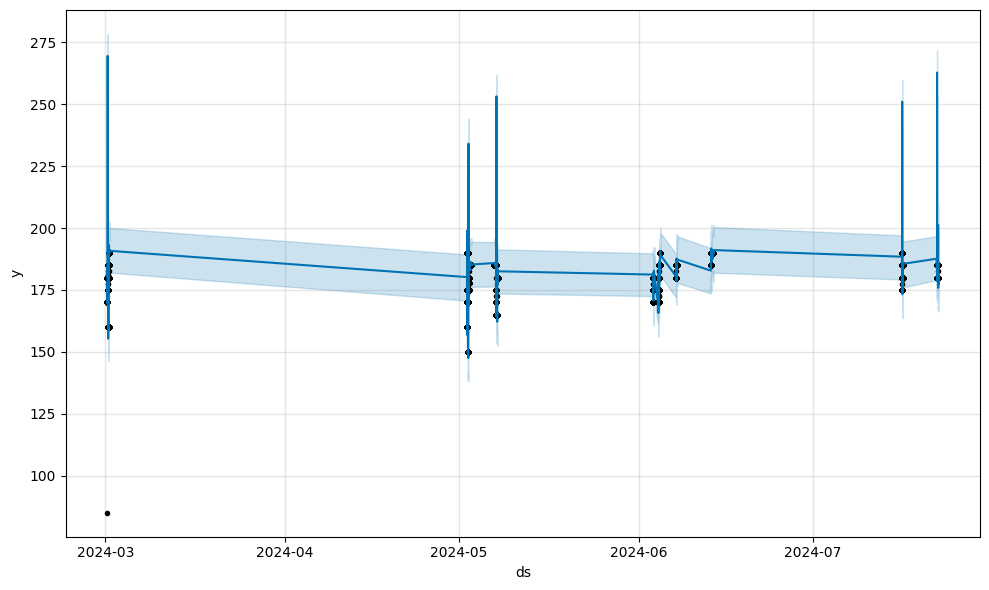

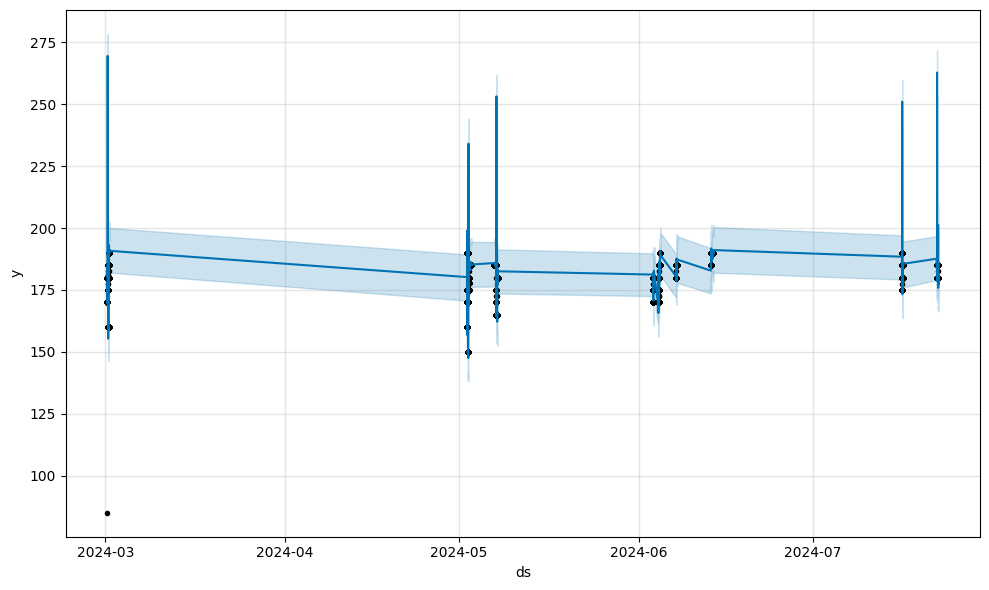

In [ ]:
model4.plot(forecast4, uncertainty=True)

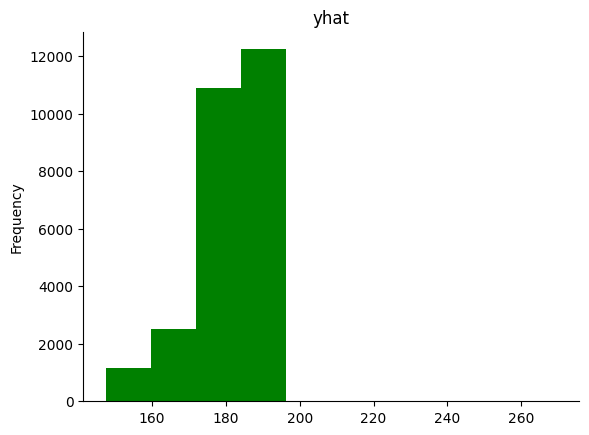

In [ ]:
forecast4['yhat'].plot(kind='hist', bins=10, title='yhat', color='green')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
merged_df4 = pd.merge(df_for_prophet_copy_test4[['ds', 'y']], forecast4[['ds', 'yhat']], on='ds')
mae = mean_absolute_error(merged_df4['y'], merged_df4['yhat'])
r2 = r2_score(merged_df4['y'], merged_df4['yhat'])
rmse = np.sqrt(mean_squared_error(merged_df4['y'], merged_df4['yhat']))

print(f"MAE: {mae}")
print(f"R²: {r2}")
print(f"RMSE: {rmse}")

MAE: 1.0436971097996952
R²: 0.9545920291548945
RMSE: 1.8310304763050216


# consigne_temperature_zone_05:

In [ ]:
df_for_prophet_copy_train5= df_for_prophet_copy_train.copy()
df_for_prophet_copy_test5= df_for_prophet_copy_test.copy()

df_for_prophet_copy_train5.rename(columns={'cgn_temp_z5':'y'}, inplace=True)
df_for_prophet_copy_test5.rename(columns={'cgn_temp_z5':'y'}, inplace=True)

In [ ]:
model5= Prophet(interval_width=0.9)
model5.add_regressor('mes_pre_mat', standardize=False)
model5.add_regressor('cgn_prop_pp_30', standardize=False)
model5.add_regressor('cgn_prop_pp_40', standardize=False)
model5.add_regressor('cgn_prop_pp_89', standardize=False)
model5.add_regressor('cgn_temp_z1', standardize=False)
model5.add_regressor('cgn_temp_z2', standardize=False)
model5.add_regressor('cgn_temp_z3', standardize=False)
model5.add_regressor('cgn_temp_z4', standardize=False)
model5.add_regressor('cgn_mot_spe', standardize=False)
model5.add_regressor('mes_temp_mat', standardize=False)
model5.add_regressor('mes_temp_z1', standardize=False)
model5.add_regressor('mes_temp_z2', standardize=False)
model5.add_regressor('mes_temp_z3', standardize=False)
model5.add_regressor('mes_temp_z4', standardize=False)
model5.add_regressor('mes_temp_z5', standardize=False)
model5.add_regressor('qual_indic', standardize=False)
model5.fit(df_for_prophet_copy_train5)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8iff1jc3/w_eqs5u4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8iff1jc3/s0iubb25.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48045', 'data', 'file=/tmp/tmp8iff1jc3/w_eqs5u4.json', 'init=/tmp/tmp8iff1jc3/s0iubb25.json', 'output', 'file=/tmp/tmp8iff1jc3/prophet_modelcb6zqw9a/prophet_model-20240904135701.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:57:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:05:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
model5.params

OrderedDict([('lp__', array([[381096.]])),
             ('k', array([[0.410923]])),
             ('m', array([[0.425043]])),
             ('delta',
              array([[-0.125829  , -0.125735  , -0.125611  ,  0.00072842,  0.00094065,
                       0.00104602,  0.00116764,  0.00131229,  0.00143107,  0.00152213,
                       0.0016227 ,  0.00530253,  0.00539119,  0.0054589 ,  0.00543131,
                       0.00555436, -0.0071519 , -0.00721209, -0.00789061, -0.0079151 ,
                      -0.00785221, -0.0044309 , -0.00869226, -0.00872396, -0.00875758]])),
             ('sigma_obs', array([[0.0254519]])),
             ('beta',
              array([[-3.04699e-03, -9.84216e-03, -1.77020e-03,  4.11584e-03,
                      -1.54430e-03, -1.01536e-02, -1.30489e-02, -1.32630e-02,
                      -3.19672e-03,  7.15024e-03,  4.32833e-03, -3.81450e-04,
                      -1.61733e-03, -1.68382e-03,  2.31513e-04, -2.74192e-03,
                      -2.5919

In [ ]:
df_for_prophet_copy_test15 = df_for_prophet_copy_test5[['ds','cgn_temp_z2',
                                'cgn_temp_z3','cgn_temp_z4',
                                'cgn_temp_z1',
                                'cgn_mot_spe',
                                'qual_indic',
                                'cgn_prop_pp_30',
                                'cgn_prop_pp_40',
                                'cgn_prop_pp_89',
                                'mes_pre_mat',
                                'mes_temp_mat',
                                'mes_temp_z1',
                                'mes_temp_z2',
                                'mes_temp_z3',
                             'mes_temp_z4',
                               'mes_temp_z5']]

In [ ]:
forecast5= model5.predict(df_for_prophet_copy_test15)
forecast5 =forecast5[['ds','yhat','yhat_lower', 'yhat_upper']]
forecast5.head(5)

ds        yhat  yhat_lower  yhat_upper
0 2024-03-01 07:51:24  165.494692  156.721270  173.586039
1 2024-03-01 07:51:26  173.136209  165.111038  181.909321
2 2024-03-01 07:51:38  173.168889  164.748384  180.892319
3 2024-03-01 07:51:48  173.032905  165.015663  181.480883
4 2024-03-01 07:51:54  172.916896  164.086994  181.867557

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


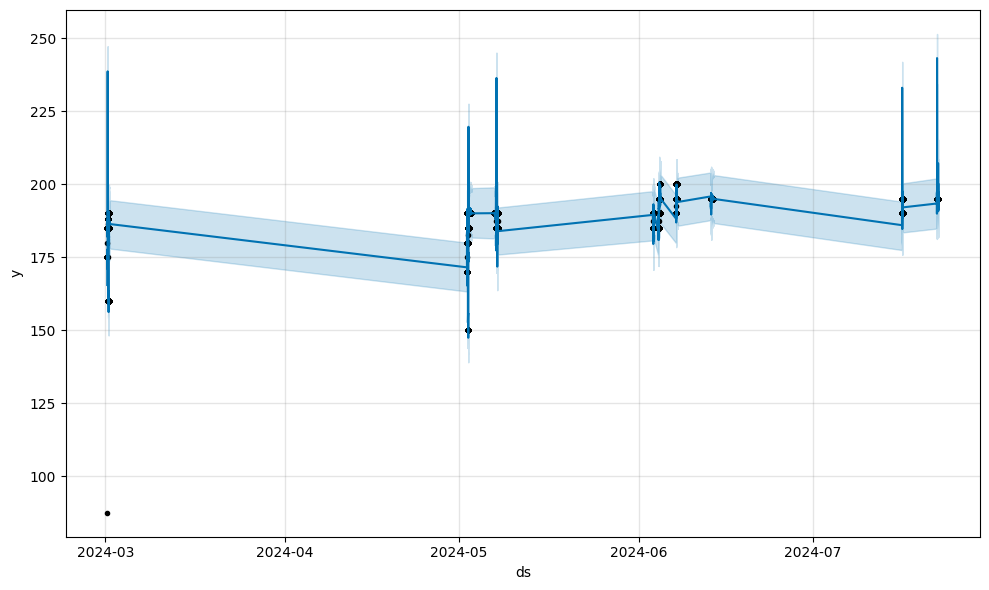

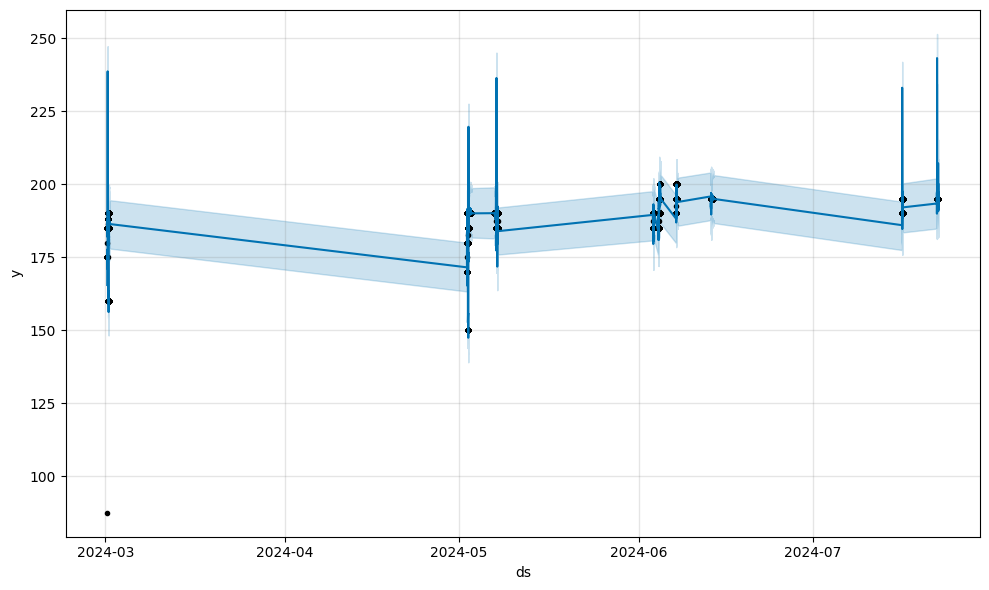

In [ ]:
model5.plot(forecast5, uncertainty=True)

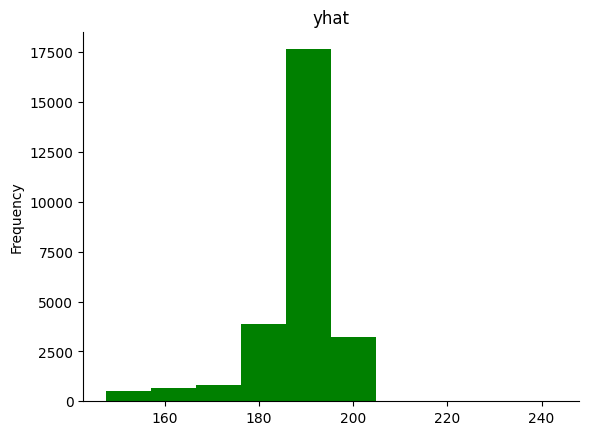

In [ ]:
forecast5['yhat'].plot(kind='hist', bins=10, title='yhat', color='green')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
merged_df5 = pd.merge(df_for_prophet_copy_test5[['ds', 'y']], forecast5[['ds', 'yhat']], on='ds')
mae = mean_absolute_error(merged_df5['y'], merged_df5['yhat'])
r2 = r2_score(merged_df5['y'], merged_df5['yhat'])
rmse = np.sqrt(mean_squared_error(merged_df5['y'], merged_df5['yhat']))

print(f"MAE: {mae}")
print(f"R²: {r2}")
print(f"RMSE: {rmse}")

MAE: 1.698088556896173
R²: 0.9171063315004728
RMSE: 2.4952092375057577


# consigne_vitesse_moteur:

In [ ]:
df_for_prophet_copy_train6= df_for_prophet_copy_train.copy()
df_for_prophet_copy_test6= df_for_prophet_copy_test.copy()

df_for_prophet_copy_train6.rename(columns={'cgn_mot_spe':'y'}, inplace=True)
df_for_prophet_copy_test6.rename(columns={'cgn_mot_spe':'y'}, inplace=True)

In [ ]:
model6= Prophet(interval_width=0.9)
model6.add_regressor('mes_pre_mat', standardize=False)
model6.add_regressor('cgn_prop_pp_30', standardize=False)
model6.add_regressor('cgn_prop_pp_40', standardize=False)
model6.add_regressor('cgn_prop_pp_89', standardize=False)
model6.add_regressor('cgn_temp_z2', standardize=False)
model6.add_regressor('cgn_temp_z1', standardize=False)
model6.add_regressor('cgn_temp_z3', standardize=False)
model6.add_regressor('cgn_temp_z4', standardize=False)
model6.add_regressor('cgn_temp_z5', standardize=False)
model6.add_regressor('mes_temp_mat', standardize=False)
model6.add_regressor('mes_temp_z1', standardize=False)
model6.add_regressor('mes_temp_z2', standardize=False)
model6.add_regressor('mes_temp_z3', standardize=False)
model6.add_regressor('mes_temp_z4', standardize=False)
model6.add_regressor('mes_temp_z5', standardize=False)
model6.add_regressor('qual_indic', standardize=False)
model6.fit(df_for_prophet_copy_train6)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8iff1jc3/h66xhskk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8iff1jc3/a6m_b8a0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7992', 'data', 'file=/tmp/tmp8iff1jc3/h66xhskk.json', 'init=/tmp/tmp8iff1jc3/a6m_b8a0.json', 'output', 'file=/tmp/tmp8iff1jc3/prophet_model7m8076kp/prophet_model-20240904140540.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:05:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:10:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
model6.params

OrderedDict([('lp__', array([[195325.]])),
             ('k', array([[0.338089]])),
             ('m', array([[-0.00027507]])),
             ('delta',
              array([[-0.061034  , -0.0611172 , -0.0613015 , -0.00921568, -0.0089756 ,
                      -0.00875608, -0.0084926 , -0.00826718, -0.00811359, -0.00788621,
                      -0.00771098,  0.00107731,  0.00127522,  0.00137283,  0.00146793,
                       0.00158253,  0.00149644,  0.00144804,  0.00119457,  0.00109528,
                       0.00142746,  0.0053565 ,  0.0104154 ,  0.0104226 ,  0.0104239 ]])),
             ('sigma_obs', array([[0.097517]])),
             ('beta',
              array([[ 0.0603884 ,  0.0522295 , -0.198726  ,  0.0212948 , -0.069912  ,
                       0.125607  , -0.036661  ,  0.0593498 , -0.0106806 , -0.00275621,
                      -0.00429002,  0.0205135 , -0.00954974,  0.0343    ,  0.00614343,
                      -0.00122687, -0.00055435, -0.00132373,  0.00129248,  0.0

In [ ]:
df_for_prophet_copy_test16 = df_for_prophet_copy_test6[['ds','cgn_temp_z1','cgn_temp_z2',
                                'cgn_temp_z3','cgn_temp_z4',
                                'cgn_temp_z5',
                                'qual_indic',
                                'cgn_prop_pp_30',
                                'cgn_prop_pp_40',
                                'cgn_prop_pp_89',
                                'mes_pre_mat',
                                'mes_temp_mat',
                                'mes_temp_z1',
                                'mes_temp_z2',
                                'mes_temp_z3',
                             'mes_temp_z4',
                               'mes_temp_z5']]

In [ ]:
forecast6= model6.predict(df_for_prophet_copy_test16)
forecast6 =forecast6[['ds','yhat','yhat_lower', 'yhat_upper']]
forecast6.head(5)

ds       yhat  yhat_lower  yhat_upper
0 2024-03-01 07:51:24 -80.653861  -92.311566  -68.788483
1 2024-03-01 07:51:26  -4.629614  -16.019572    7.481034
2 2024-03-01 07:51:38  -4.403424  -16.145487    7.754975
3 2024-03-01 07:51:48  -4.292795  -16.552006    7.250021
4 2024-03-01 07:51:54  -3.950391  -15.763050    7.936025

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


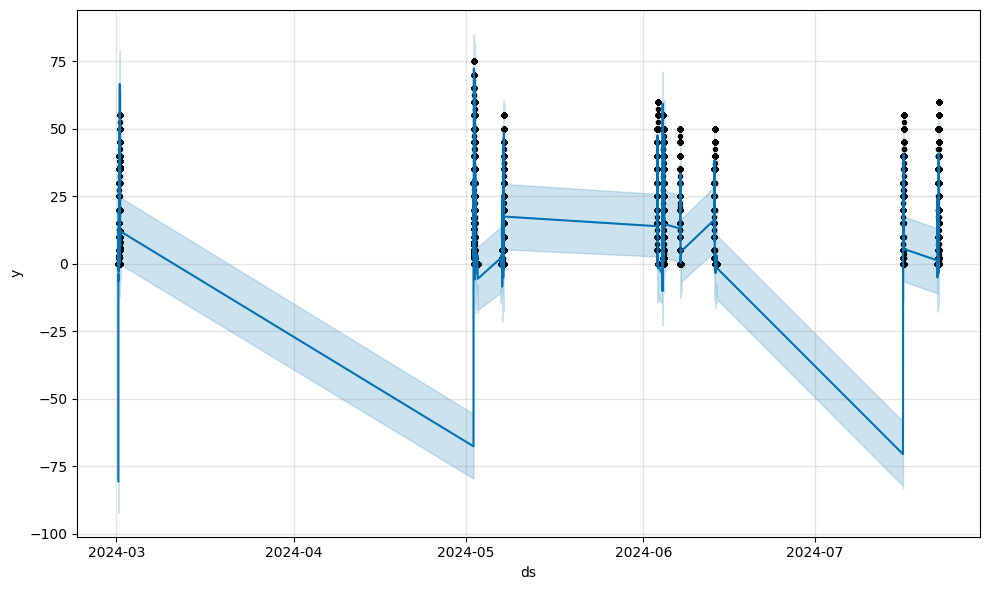

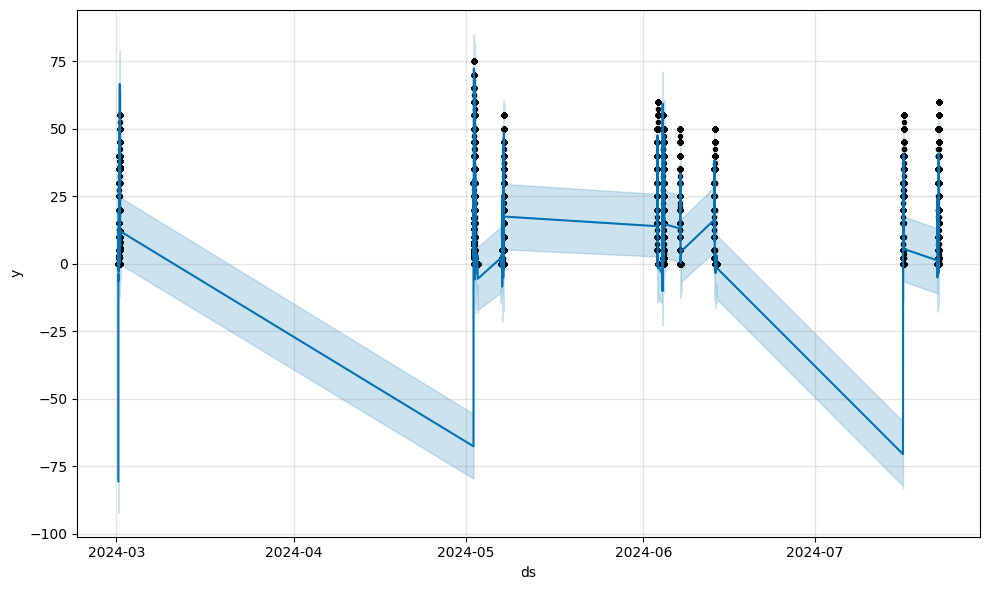

In [ ]:
model6.plot(forecast6, uncertainty=True)

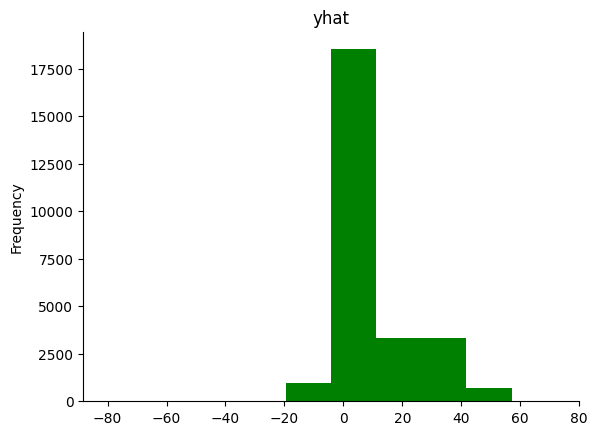

In [ ]:
forecast6['yhat'].plot(kind='hist', bins=10, title='yhat', color='green')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
merged_df6 = pd.merge(df_for_prophet_copy_test6[['ds', 'y']], forecast6[['ds', 'yhat']], on='ds')
mae = mean_absolute_error(merged_df6['y'], merged_df6['yhat'])
r2 = r2_score(merged_df6['y'], merged_df6['yhat'])
rmse = np.sqrt(mean_squared_error(merged_df6['y'], merged_df6['yhat']))

print(f"MAE: {mae}")
print(f"R²: {r2}")
print(f"RMSE: {rmse}")

MAE: 4.532759118449485
R²: 0.7750555798167352
RMSE: 7.275262289381772
